<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/itsystems/nntutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Úvodní příklad

Inspirováno zdrojem

https://machinelearningmastery.com/neural-networks-are-function-approximators/

## Definice funkce

In [1]:
def func(x):
  return x * x

def funcDomain():
  return [i for i in range(-50, 51)]

## První, analytický pohled na funkci

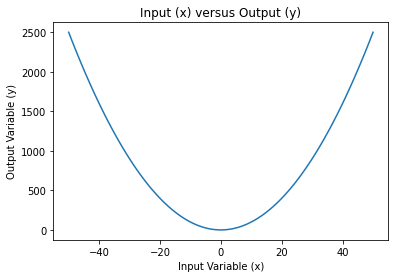

In [2]:
# example of creating a univariate dataset with a given mapping function
import matplotlib.pyplot as plt
# define the input data
x = funcDomain() #[i for i in range(-50,51)]
# define the output data
y = [func(i) for i in x]
# plot the input versus the output
plt.plot(x, y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

## Získání datové množiny

In [4]:
from numpy import asarray
# define the dataset
x = asarray(funcDomain())
y = asarray([func(i) for i in x])
print(x.min(), x.max(), y.min(), y.max())
print(x)
print(y)

-50 50 0 2500
[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]
[2500 2401 2304 2209 2116 2025 1936 1849 1764 1681 1600 1521 1444 1369
 1296 1225 1156 1089 1024  961  900  841  784  729  676  625  576  529
  484  441  400  361  324  289  256  225  196  169  144  121  100   81
   64   49   36   25   16    9    4    1    0    1    4    9   16   25
   36   49   64   81  100  121  144  169  196  225  256  289  324  361
  400  441  484  529  576  625  676  729  784  841  900  961 1024 1089
 1156 1225 1296 1369 1444 1521 1600 1681 1764 1849 1936 2025 2116 2209
 2304 2401 2500]


## Normalizace hodnot

### Normalizace datové struktury

In [5]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
print(x)
print(y)

[[-50]
 [-49]
 [-48]
 [-47]
 [-46]
 [-45]
 [-44]
 [-43]
 [-42]
 [-41]
 [-40]
 [-39]
 [-38]
 [-37]
 [-36]
 [-35]
 [-34]
 [-33]
 [-32]
 [-31]
 [-30]
 [-29]
 [-28]
 [-27]
 [-26]
 [-25]
 [-24]
 [-23]
 [-22]
 [-21]
 [-20]
 [-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]]
[[2500]
 [2401]
 [2304]
 [2209]
 [2116]
 [2025]
 [1936]
 [1849]
 [1764]
 [1681]
 [1600]
 [1521]
 [1444]
 [1369]
 [1296]
 [1225]
 [1156]
 [1089]
 [1024]
 [ 961]
 [ 900]
 [ 841]
 [ 784]
 [ 729]
 [ 676]
 [ 625]
 [ 576]
 [ 529]
 [ 484]
 [ 441]
 [ 400]
 [ 361]
 [ 324]
 [ 289]
 [ 256]
 [ 225]
 [ 1

### Normalizace hodnot

In [7]:
from sklearn.preprocessing import MinMaxScaler

# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


## Konstrukce neuronové sítě

### Struktura

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

### Příprava modelu

In [ ]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

### Trénování na datové množině

Tréning je obecně stochastickou operací, takže výsledky trénování se mohou lišit. Může být vhodné provést několik pokusů trénování a jako výsledný zvolit nejlepší z nich.

In [ ]:
# fit the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

## Predikce nad trénovací množinou

Predikce probíhá do normalizovaného prostoru, je nezbytné tedy provést zpětnou transformaci do původního prostoru funkce.

In [ ]:
# make predictions for the input data
yhat = model.predict(x)

In [ ]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [ ]:
from sklearn.metrics import mean_squared_error
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 2570.536


## Vizualizace predikovaných dat

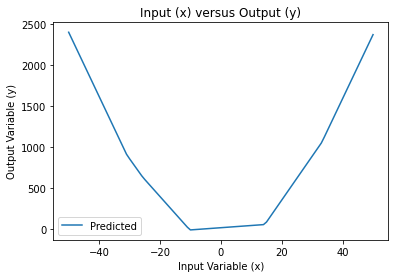

In [ ]:
# plot x vs yhat
plt.plot(x_plot,yhat_plot, label='Predicted')
plt.plot(x_plot, y_plot, label='Original')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

# Aplikace

## Definice funkce

In [8]:
from math import sin, pi

# http://www.fyzika007.cz/gravitacni-pole/sikmy-vrh-vzhuaru

def delka(v0, alfa):
  g = 9.81
  return v0 * v0 / g * sin(2 * alfa)

def func(x):
  return delka(x, pi / 4)

def funcDomain():
  return [i for i in range(10, 100)]


## Získání datové množiny

In [9]:
x = asarray(funcDomain())
y = asarray([func(i) for i in x])

## Normalizace hodnot

In [10]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


## Konstrukce neuronové sítě

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

# fit the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

## Predikce

In [12]:
# make predictions for the input data
yhat = model.predict(x)

# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

## Vizualizace

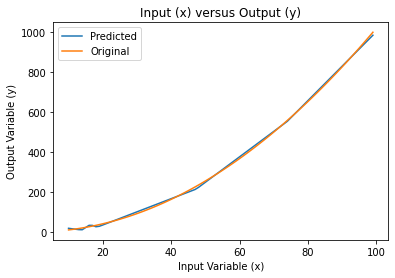

In [13]:
# plot x vs yhat
plt.plot(x_plot,yhat_plot, label='Predicted')
plt.plot(x_plot, y_plot, label='Original')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()